> **Note:** In most sessions you will be solving exercises posed in a Jupyter notebook that looks like this one. Because you are cloning a Github repository that only we can push to, you should **NEVER EDIT** any of the files you pull from Github. Instead, what you should do, is either make a new notebook and write your solutions in there, or **make a copy of this notebook and save it somewhere else** on your computer, not inside the `sds` folder that you cloned, so you can write your answers in there. If you edit the notebook you pulled from Github, those edits (possible your solutions to the exercises) may be overwritten and lost the next time you pull from Github. This is important, so don't hesitate to ask if it is unclear.

# Exercise Set 3: Non-linear ML
In this Exercise Set 3 we will work with the Breast Cancer dataset.

**Load and parse data**

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()

X = raw_data['data']
y = raw_data['target']


df_breast = pd.DataFrame(
    np.hstack([raw_data['data'], raw_data['target'].reshape(-1, 1)]),
    columns=raw_data['feature_names'].tolist() + ['benign']
)
df_breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


<br>
<br>

# Ensemble models with trees

### Random forest

> **Ex. 3.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

In [ ]:
# [Answer to Ex. 3.1.1]

In [ ]:
# n_estimators: number of trees
# max_depth: maximal number of total splits applied
# max_features: number of features used for splitting
# bootstrap: whether or not to use bootstrap to sample observations or all data

> **Ex. 3.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

In [ ]:
# [Answer to Ex. 3.1.2]

In [ ]:
# max_features = X.shape[1]
# bootstrap = False

> **Ex. 3.1.3**: Plot training and test accuracy of the random forest classifier as a function of `n_estimators`. Also indicate with a horizontal line (e.g. use `plt.axhline`) where the baseline accuracy lies (always guessing for majority class). Comparing and training and test performance, can you say something abotu how your model performs? And how does it perform relative to baseline? Report your maximum testing accuracy.
>
> *Hints: Use `validation_curve` with the `cross_validate` method and give the latter the argument `return_train_score=True` to assess both training and test scores during cross validation. Also, you could let `n_estimators` vary on a logarithmic scale (like `np.logspace(np.log10(5), np.log10(500), 20)`) and log-scale the x-axis in your plot (`plt.xscale('log')`).*

In [ ]:
# [Answer to Ex. 3.1.3]

(0.6, 1.05)

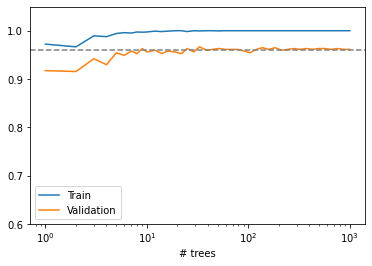

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

tree_count = np.unique(np.logspace(0,3).astype(int))

train_scores, test_scores = \
    validation_curve(estimator=RandomForestClassifier(),
                     X=X,
                     y=y,
                     param_name='n_estimators',
                     param_range=tree_count,       
                     cv=5)

mse_score = pd.DataFrame({'Train':train_scores.mean(axis=1),
                          'Validation':test_scores.mean(axis=1),
                          '# trees':tree_count})\
              .set_index('# trees')   

f,ax = plt.subplots()
mse_score.plot(logx=True, ax=ax)
ax.axhline(0.96, color='gray', linestyle='--')
ax.set_ylim(.6,1.05)

### Boosting

#### Adapative boosting

Recall that boosting uses not only many independent trees, but leverage trees that learn from one another.

> **Ex. 3.1.4**: Repeat Ex. 3.1.3, but using AdaBoost. Do you notice any performance difference?

In [ ]:
# [Answer to Ex. 3.1.4]

(0.6, 1.05)

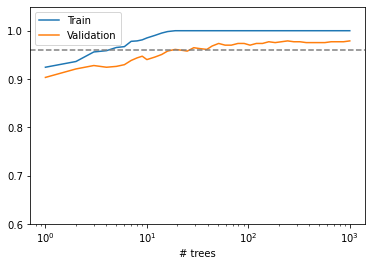

In [57]:
from sklearn.ensemble import AdaBoostClassifier

train_scores_boost, test_scores_boost = \
    validation_curve(estimator=AdaBoostClassifier(),
                     X=X,
                     y=y,
                     param_name='n_estimators',
                     param_range=tree_count,                
                     cv=5)

mse_score_boost = pd.DataFrame({'Train':train_scores_boost.mean(axis=1),
                          'Validation':test_scores_boost.mean(axis=1),
                          '# trees':tree_count})\
              .set_index('# trees')   

f,ax = plt.subplots()
mse_score_boost.plot(logx=True,ax=ax)
ax.axhline(0.96,color='gray',linestyle='--')
ax.set_ylim(.6,1.05)

*Answer comment:*  AdaBoost is 1.5 percent points more accurate than random forest!

#### Gradient boosting

An alternative way of using boosting is gradient boosting. This uses the gradient of the residual of the previous learner to estimate the next learner. 

In [ ]:
# [Answer to Ex. 3.1.5]

> **Ex. 3.1.5**: Repeat Ex. 3.1.3, but using `sklearn.ensemble.GradientBoostingClassifier`. Do you notice any performance difference?

(0.6, 1.05)

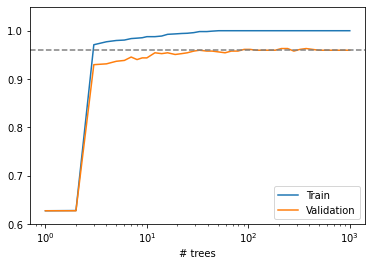

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

train_scores_xgboost, test_scores_xgboost = \
    validation_curve(estimator=GradientBoostingClassifier(),
                     X=X,
                     y=y,
                     param_name='n_estimators',
                     param_range=tree_count,                
                     cv=5)

mse_score_xgboost = pd.DataFrame({'Train':train_scores_xgboost.mean(axis=1),
                          'Validation':test_scores_xgboost.mean(axis=1),
                          '# trees':tree_count})\
              .set_index('# trees')   

f,ax = plt.subplots()
mse_score_xgboost.plot(logx=True,ax=ax)
ax.axhline(0.96,color='gray',linestyle='--')
ax.set_ylim(.6,1.05)

*Answer comment:*  XGBoost is around as good as random forest.

# Decision tree mechanism

Here you will be manually implementing the decision tree mechanism across a number of connected exercises.

>**Ex. 3.2.1**: Find the best feature to split on. There are many ways to do this, and we will be very practical about this and use the Pearson correlatio coefficient between a feature and the outcome, as an indicator of goodness.
Therefore, write a function that takes your input data `data_features` as input and returns the name of the feature that has the highest absolute (positive or negative) correlation with the outcome.
Use this function on your data to find the best initial feature to split on.
>
> *Hint: You can use `scipy.stats.pearsonr` to compute the correlation coefficient. E.g. to compute the absolute correlation coefficient between two variables `a` and `b`, I would write `abs(pearsonr(a, b)[0])`.*

In [ ]:
# [Answer to Ex. 3.2.1]

In [58]:
from scipy.stats import spearmanr

def best_feature(data):
    correlations = []
    for feature in df_breast.columns[:-1]:
        correlations.append(
            abs(spearmanr(data[feature], data['benign'])[0])
        )
    top_i = np.argmax(correlations)
    return df_breast.columns[top_i]

best_feature(df_breast)

'worst perimeter'

>**Ex. 3.2.2**: Read about [Shannon entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)). Write a function that computes the Shannon-entropy of a probability vector. Compute the Shannon entropy of `p=[0.4, 0.6]`.

In [59]:
# [Answer to Ex. 3.2.2]

In [60]:
def shannon_entropy(p):
    return - sum([p_ * np.log(p_) for p_ in p])

shannon_entropy([0.4, 0.6])

0.6730116670092565

>**Ex. 3.2.3**: Compute split entropy. 
1. Write a function `split_data_on(data, feature, thr)` that takes as input your data, initially `df_breast`, a threshold, `thr`, and a feature, `feature`, and then splits the data into two subsets (also `pandas.Dataframe`s), `data0` and `data1`, where samples in `data0` have `data[feature] > thr` and samples in `data1` have `data[feature] > thr`. Use it to split `df_breast` on the 'worst perimeter' feature at 105.9, to create two new variables `data0` and `data1` and print their number of rows.
1. Write another function `outcome_entropy(data)` that computes the entropy of outcomes ('benign' column), given a subset. Print the entropies of `data0` and `data1`.
2. Write a final function `split_entropy(data0, data1)` that uses the previous function to compute the split entropy (i.e. weighted average of both resulting subsets). Compute the split entropy.

In [61]:
# [Answer to Ex. 3.2.3]

In [62]:
# part 1: function to split data
def split_data_on(data, feature, thr):
    """Function that splits the data on the given feature and
    returns two new datasets.
    """
    mask = data[feature] > thr
    return data[~mask], data[mask]

data0, data1 = split_data_on(df_breast, 'worst perimeter', 105.9)
print(data0.shape[0], data1.shape[0])

345 224


In [63]:
# part 2: function to compute candidate entropy
from collections import Counter

def outcome_entropy(datai):
    def _probability_dist_of_labels(list_of_labels):
        label_counts = Counter(list_of_labels)
        return [v/sum(label_counts.values()) for k, v in label_counts.items()]
    return shannon_entropy(_probability_dist_of_labels(datai['benign']))

print(outcome_entropy(data0))
print(outcome_entropy(data1))

0.19637603906337475
0.3853670652946007


In [64]:
# part 3: compute split entropy
def split_entropy(data0, data1):
    # Compute entropies
    ent0 = outcome_entropy(data0)
    ent1 = outcome_entropy(data1)

    # Compute weights
    w0 = data0.shape[0] / (data0.shape[0] + data1.shape[0])
    w1 = data1.shape[0] / (data0.shape[0] + data1.shape[0])

    # Return result
    return ent0 * w0 + ent1 * w1

split_entropy(data0, data1)

0.27077672425809285

>**Ex. 3.2.4**: Find the optimal split threshold. Write a function called `optimal_threshold(data, feature)`
that takes as input your data and a feature, and loops over all possible splits for a feature such as to find and return the minimum split entropy and associated threshold. Execute it for 'worst perimeter' does this match up with your results from 2.3.2?

In [65]:
# [Answer to Ex. 3.2.4]

In [67]:
def optimal_threshold(data, feature):
    return min(
        [
            (
                thr,
                split_entropy(*split_data_on(data, feature, thr))
            )
            for thr in data[feature]
        ],
        key=lambda kv: kv[1]
    )

optimal_threshold(df_breast, 'worst perimeter')

(105.9, 0.27077672425809285)

>**Ex. 3.2.5**: Now you have (1) a function that finds the best feature to split on, given dataframe of data, and (2) another function that computes the threshold at which to split it into two new subsets. Implement the decision tree mechanism, and print the maximum entropy path.
>1. Implement the following pseudocode and print the output:<br><br>
>Step 0. Initially, set `data = df_breast`.<br>
>Step 1. Find the feature that gives the lowest split entropy for `data` (use `best_feature`). Print the name of the feature.<br>
>Step 2. Split `data` *on the optimal threshold* of that feature, to produce `data0` and `data1` (use `optimal_threshold` to find the optimal threshold and then use `split_data_on` to actually split it). Print the entropy of each, as well as their weighted avg. entropy (i.e. the split entropy).<br>
>Step 3. Overwrite the `data` variable with either `data0` or `data1`, depending on which has the highest entropy.<br>
>Step 4. Stop if there are less than 5 datapoints in `data`. Otherwise start over from 1.<br><br>
>My output looks [like this](https://github.com/abjer/sds_eml_2020/blob/master/material/session_2/solution_2.3.5.2.png) for the first five splits.<br><br>
>
>2. Comment on decision path your code takes: How many splits are there? Does average entropy always decrease? Anything else worth commenting on?


In [ ]:
# [Answer to Ex. 3.2.5]

In [68]:
# part 1: 


# step 0: copy the breast dataframe as `data`
data = df_breast.copy() 

i = 0
while True:
    
        
    # step 1
    split_feature = best_feature(data)
    
    # step 2a
    thr, ent = optimal_threshold(data, split_feature)
    
    # step 2b
    data0, data1 = split_data_on(data, split_feature, thr)

    # step 3
    ent0 = outcome_entropy(data0)
    ent1 = outcome_entropy(data1)
    
    # Print output
    print(f"Split {i}: {split_feature}")
    print("-" * len(f"Split {i}: {split_feature}"))
    print("    data0:")
    print(f"        size:    {len(data0)}")
    print(f"        entropy: {ent0}")
    print("    data1:")
    print(f"        size:    {len(data1)}")
    print(f"        entropy: {ent1}")
    print(f"    --> average entropy: {ent}\n")
    
    # step 3 (continued)
    if ent0 > ent1:
        data = data0
    else:
        data = data1
    
    i += 1
    
    # step 4
    if len(data) < 5:
        break
    

Split 0: worst perimeter
------------------------
    data0:
        size:    345
        entropy: 0.19637603906337475
    data1:
        size:    224
        entropy: 0.3853670652946007
    --> average entropy: 0.27077672425809285

Split 1: mean concave points
----------------------------
    data0:
        size:    34
        entropy: 0.6652042646399301
    data1:
        size:    190
        entropy: 0.17457802278461543
    --> average entropy: 0.24904807735193996

Split 2: worst texture
----------------------
    data0:
        size:    16
        entropy: 0.2337916587064593
    data1:
        size:    18
        entropy: 0.6365141682948128
    --> average entropy: 0.4469976931944112

Split 3: concavity error
------------------------
    data0:
        size:    14
        entropy: 0.410116318288409
    data1:
        size:    4
        entropy: -0.0
    --> average entropy: 0.31897935866876254

Split 4: concave points error
-----------------------------
    data0:
        size:    

*Answer comment:*  Our procedure tends to split into a high-entropy chunk and a small-entropy chunk. If the high-entropy chunk were always bigger than
the small entropy chunk, then we would likely see split entropy decrease monotously, but already at split 1 we see
that the small chunk has the highest entropy, and as such we continue splitting on that. Because this happens
we end up having to split a very small chunk of data, and potentially, this is not easily split to the average split
entropy rises again.

>**Ex. 3.2.6**:  Train a `sklearn.tree.DecisionTreeClassifier` classifier on the dataset. Initiate the classifier with `criterion='entropy'`. What are the most important features of this classifier? How does this line up with the order of splits you just printed (a comment is fine)?

In [ ]:
# [Answer to Ex. 3.2.6]

In [69]:
from sklearn.tree import DecisionTreeClassifier

# train model
model = DecisionTreeClassifier(criterion='entropy')
model.fit(df_breast.drop("benign", axis=1), df_breast.benign)

# print feature importances
sorted(zip(df_breast.columns[:-1], model.feature_importances_), key=lambda kv: kv[1], reverse=True)[:10]

[('worst perimeter', 0.6858889407411874),
 ('worst concave points', 0.1007829871346577),
 ('worst texture', 0.06578937698875978),
 ('worst smoothness', 0.04462567019858399),
 ('area error', 0.028545188843586103),
 ('worst symmetry', 0.017287741269216263),
 ('worst area', 0.013472884788102825),
 ('symmetry error', 0.011973493890974152),
 ('mean perimeter', 0.008022360450480735),
 ('mean smoothness', 0.007379401422266072)]

*Answer comment:* The decision tree heavily overweights the importance of the first feature it splits on, but we see it
chooses the same one as we do. For the remainder, there are differences, of course because we only split on the most
entropous subset.

# Neural networks

### A visual inspection of neural networks
Instead of diving into code, it's more important that our intuition about what neural networks are doing is as good as possible. And the best (and most fun) way to do that is to play around and with things a bit, so go familiarize yourself with the [Tensorflow Playground](https://playground.tensorflow.org/), slide some knobs and pull some levers. The example in the lecture uses the same idea for demonstrating the intuition of neural networks.

> **Ex. 3.3.1** Using the dataset with the two well-seperate guassian distributions, create the minimal neural network that seperates the clusters. You can report your answer with a link (the URL on playground.tensorflow.org changes as you update the network, so at any time you can use the link to show others what you have created).


In [71]:
# [Answer to Ex. 3.3.1]

[Candidate answer](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=&seed=0.51946&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

> **Ex. 3.3.2** Using the dataset with the two circular clusters, one inner and one outer. Create the minimal neural network that seperates the clusters. Again, report your answer with a link.

In [71]:
# [Answer to Ex. 3.3.2]

[Candidate answer](https://playground.tensorflow.org/#activation=sigmoid&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=3&seed=0.16342&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

> **Ex. 3.3.3** See if you can create a network that performs well on the the dataset with the intertwined spirals. Again, report your answer with a link. Can you do it with only $x_1$ and $x_2$?

>> *Hint*: try experimenting with depth of the network, regularization and possibly the activation function

In [73]:
# [Answer to Ex. 3.3.3]

[Candidate answer using all features](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=7,7,8&seed=0.64953&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=true&xSquared=true&ySquared=true&cosX=false&sinX=true&cosY=false&sinY=true&collectStats=false&problem=classification&initZero=false&hideText=false) and [candidate answer with vertical/horizontal only](https://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0.001&noise=0&networkShape=8,8,8,8,8&seed=0.65027&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)